In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kmodes.kprototypes import KPrototypes
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

scaledFeatures = pd.read_csv("../../data/sets/insurance_mmx_scaled.csv")
maxClusters = 25
sb.set()

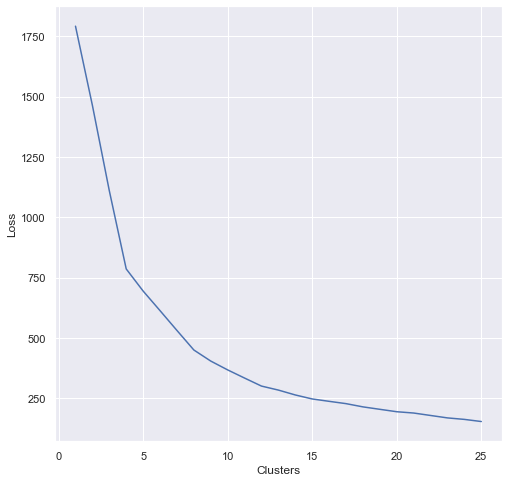

In [2]:
### Elbow method for KMeans ###

losses = []
for i in range(1, maxClusters + 1):
    km = KMeans(n_clusters = i, random_state = 20)
    km.fit(scaledFeatures)
    losses.append(km.inertia_)

plt.figure(figsize = (8, 8))
plt.plot(range(1, maxClusters + 1), losses)
plt.xlabel('Clusters')
plt.ylabel('Loss')
plt.show()

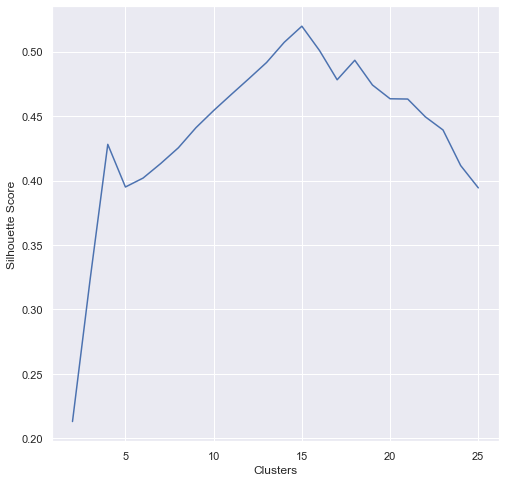

In [3]:
### Silhouette analysis for KMeans ###

scores = []
for i in range(2, maxClusters + 1):
    km = KMeans(n_clusters = i, random_state = 20)
    km.fit(scaledFeatures)
    score = silhouette_score(scaledFeatures, km.labels_)
    scores.append(score)

plt.figure(figsize = (8, 8))
plt.plot(range(2, maxClusters + 1), scores)
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
plt.show()

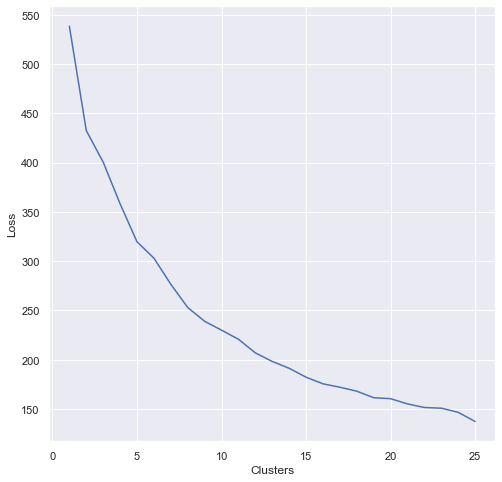

In [4]:
### Elbow method for KPrototypes ###

losses = []
for i in range(1, maxClusters + 1):
    kp = KPrototypes(n_clusters = i, init = "Cao")
    kp.fit(scaledFeatures, categorical = [3, 4, 5, 6, 7, 8])
    losses.append(kp.cost_)

plt.figure(figsize = (8, 8))
plt.plot(range(1, maxClusters + 1), losses)
plt.xlabel('Clusters')
plt.ylabel('Loss')
plt.show()

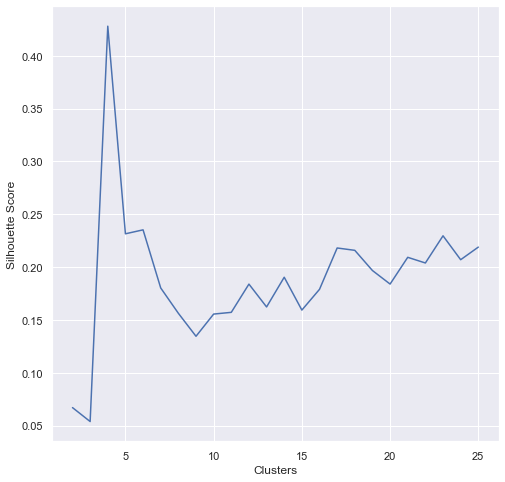

In [5]:
### Silhouette analysis for KPrototypes ###

scores = []
for i in range(2, maxClusters + 1):
    kp = KPrototypes(n_clusters = i, init = "Cao")
    kp.fit(scaledFeatures, categorical = [3, 4, 5, 6, 7, 8])
    score = silhouette_score(scaledFeatures, kp.labels_)
    scores.append(score)

plt.figure(figsize = (8,8))
plt.plot(range(2, maxClusters + 1), scores)
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
plt.show()

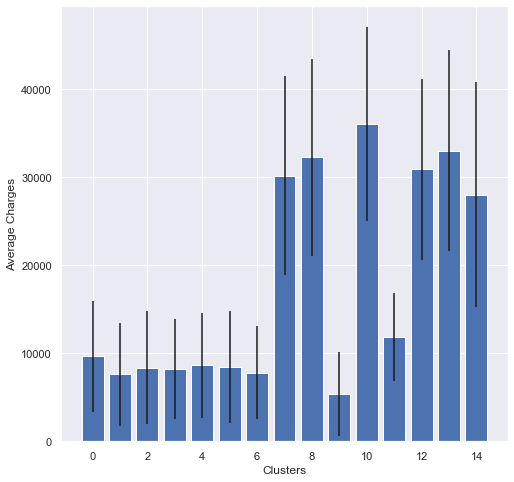

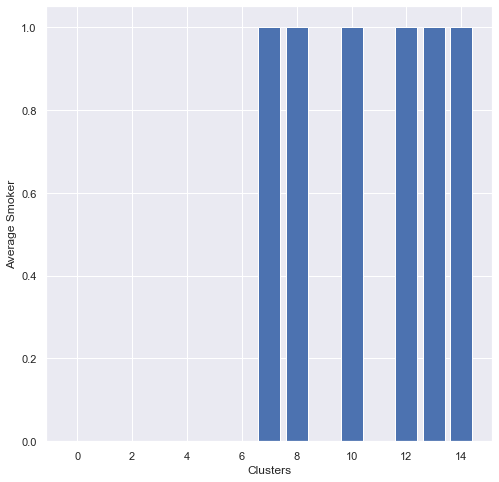

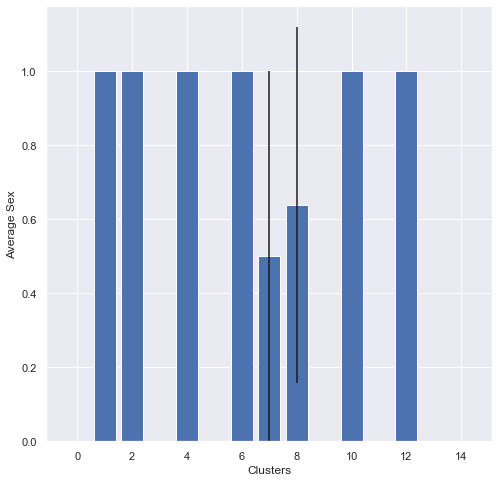

In [103]:
### Analyze KMeans clustering ###

clusterCount = 15
cleanInsurance = pd.read_csv("../../data/sets/insurance_clean.csv")

km = KMeans(n_clusters = clusterCount)
clusters = km.fit_predict(scaledFeatures)
cleanInsurance["cluster"] = clusters

clusterAvgs = pd.DataFrame(columns = cleanInsurance.columns)
clusterStds = pd.DataFrame(columns = cleanInsurance.columns)

for i in range(clusterCount):
    clusterFilter = cleanInsurance["cluster"] == i
    clusterData = cleanInsurance[clusterFilter]
    currentAvgs = np.mean(clusterData, axis = 0)
    currentStds = np.std(clusterData, axis = 0)
    clusterAvgs = clusterAvgs.append(currentAvgs, ignore_index = True)
    clusterStds = clusterStds.append(currentStds, ignore_index = True)

# Other features did not show noticeable differences between clusters so not plotting them
plt.figure(figsize = (8,8))
plt.bar(clusterAvgs["cluster"], clusterAvgs["charges"], yerr = clusterStds["charges"])
plt.xlabel("Clusters")
plt.ylabel("Average Charges")
plt.show()

plt.figure(figsize = (8,8))
plt.bar(clusterAvgs["cluster"], clusterAvgs["smoker"], yerr = clusterStds["smoker"])
plt.xlabel("Clusters")
plt.ylabel("Average Smoker")
plt.show()

plt.figure(figsize = (8,8))
plt.bar(clusterAvgs["cluster"], clusterAvgs["sex"], yerr = clusterStds["sex"])
plt.xlabel("Clusters")
plt.ylabel("Average Sex")
plt.show()